# Previsão de preços de alugueis em Nova York

## Desafio

Você foi alocado(a) em um time da Indicium que está trabalhando atualmente junto a um cliente no processo de criação de uma plataforma de aluguéis temporários na cidade de Nova York. Para o desenvolvimento de sua estratégia de precificação, pediu para que a Indicium fizesse uma análise exploratória dos dados de seu maior concorrente, assim como um teste de validação de um modelo preditivo.

**O objetivo é desenvolver um modelo de previsão de preços a partir do *dataset* oferecido, e avaliar tal modelo utilizando as métricas de avaliação que mais fazem sentido para o problema.** 

Principais etapas do projeto:
1. Definição do problema
2. Entendimento e tratamento de dados
3. Análise Exploratória
4. Tratamento dos Dados
5. Definição do modelo
6. Modelo em produção

# 1. Definição do problema
*Para entender o problema algumas perguntas são fundamentais:*
 - De forma direta: "Qual o problema que eu quero resolver?" 
 
 R: Precificação de imóveis para aluguéis temporários na cidade de Nova York.

 - Quais são as minhas métricas de sucesso?
 
 R: 
Métrica	Quando Priorizar
RMSE - Se outliers forem preocupantes.
MAE - Para interpretação direta em dólares.
MAPE - Para comunicar resultados em % ao negócio.
% Erro Aceitável - Se o cliente tem tolerância definida (ex: 15%).

 - Qual o prazo desejado para esse projeto? 
 
 R: 7 dias

 - Quem são os interessados nesse resultado? 
 
 R: Stakeholders do ramo imobiliário.

 - Quais são os **dados** disponíveis?
 
 R: Dados de uma plataforma concorrente do mercado imobiliário de alugéis temporários na cidade de Nova York.

# 2. Entendimento e tratamento dos dados

In [33]:
#Importando os dados do dataset
import pandas as pd
dados = pd.read_csv(r'D:\Data Science\Indicium\data\teste_indicium_precificacao.csv')

In [34]:
#Visualizando o formato dos dados
dados.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [35]:
#Visualizando as informações sobre a contagem de valores não nulos e a tipagem dos dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

In [36]:
#Excluindo toda linha vazia que exista no database
dados = dados.dropna(how= 'all')

In [37]:
#Visualizando as informações sobre a contagem de valores não nulos e a tipagem dos dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

In [38]:
#Visualizando a quantidade de valores nulos por coluna
dados.isnull().sum()

id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64

# Problemas Encontrados
- *Valores nulos nas colunas*: nome, host_name, ultima_review e reviews_por_mes

*Sugestões de solução*
- nome e host_name: Substituir os valores nulos por um identificador padrão "No_register"
- ultima_review: Converter o tipo de dados para o tipo de data. E substituir por uma data padrão "2000-01-01"
- reviews_por_mes: Substituir por "0"

# Corrigindo os valores nulos

In [39]:
#Filtrando os valores nulos da coluna "nome"
dados.loc[dados.nome.isnull()]

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
2853,1615764,NaN,6676776,Peter,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,NaN,NaN,1,362
3702,2232600,NaN,11395220,Anna,Manhattan,East Village,40.73215,-73.98821,Entire home/apt,200,1,28,2015-06-08,0.45,1,341
5774,4209595,NaN,20700823,Jesse,Manhattan,Greenwich Village,40.73473,-73.99244,Entire home/apt,225,1,1,2015-01-01,0.02,1,0
5974,4370230,NaN,22686810,Michaël,Manhattan,Nolita,40.72046,-73.99550,Entire home/apt,215,7,5,2016-01-02,0.09,1,0
6268,4581788,NaN,21600904,Lucie,Brooklyn,Williamsburg,40.71370,-73.94378,Private room,150,1,0,NaN,NaN,1,0
6566,4756856,NaN,1832442,Carolina,Brooklyn,Bushwick,40.70046,-73.92825,Private room,70,1,0,NaN,NaN,1,0
6604,4774658,NaN,24625694,Josh,Manhattan,Washington Heights,40.85198,-73.93108,Private room,40,1,0,NaN,NaN,1,0
8840,6782407,NaN,31147528,Huei-Yin,Brooklyn,Williamsburg,40.71354,-73.93882,Private room,45,1,0,NaN,NaN,1,0
11962,9325951,NaN,33377685,Jonathan,Manhattan,Hell's Kitchen,40.76436,-73.98573,Entire home/apt,190,4,1,2016-01-05,0.02,1,0
12823,9787590,NaN,50448556,Miguel,Manhattan,Harlem,40.80316,-73.95189,Entire home/apt,300,5,0,NaN,NaN,5,0


In [40]:
#Criando uma coluna que conta a quantidade de caracteres do nome do anuncio
dados['nome_caracteres'] = dados.nome.str.len()
dados.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,nome_caracteres
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,21.0
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,35.0
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,31.0
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,48.0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,41.0


In [41]:
dados.nome_caracteres = dados.nome_caracteres.fillna(0)
dados.loc[dados.nome_caracteres == 0]

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,nome_caracteres
2853,1615764,NaN,6676776,Peter,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,NaN,NaN,1,362,0.0
3702,2232600,NaN,11395220,Anna,Manhattan,East Village,40.73215,-73.98821,Entire home/apt,200,1,28,2015-06-08,0.45,1,341,0.0
5774,4209595,NaN,20700823,Jesse,Manhattan,Greenwich Village,40.73473,-73.99244,Entire home/apt,225,1,1,2015-01-01,0.02,1,0,0.0
5974,4370230,NaN,22686810,Michaël,Manhattan,Nolita,40.72046,-73.99550,Entire home/apt,215,7,5,2016-01-02,0.09,1,0,0.0
6268,4581788,NaN,21600904,Lucie,Brooklyn,Williamsburg,40.71370,-73.94378,Private room,150,1,0,NaN,NaN,1,0,0.0
6566,4756856,NaN,1832442,Carolina,Brooklyn,Bushwick,40.70046,-73.92825,Private room,70,1,0,NaN,NaN,1,0,0.0
6604,4774658,NaN,24625694,Josh,Manhattan,Washington Heights,40.85198,-73.93108,Private room,40,1,0,NaN,NaN,1,0,0.0
8840,6782407,NaN,31147528,Huei-Yin,Brooklyn,Williamsburg,40.71354,-73.93882,Private room,45,1,0,NaN,NaN,1,0,0.0
11962,9325951,NaN,33377685,Jonathan,Manhattan,Hell's Kitchen,40.76436,-73.98573,Entire home/apt,190,4,1,2016-01-05,0.02,1,0,0.0
12823,9787590,NaN,50448556,Miguel,Manhattan,Harlem,40.80316,-73.95189,Entire home/apt,300,5,0,NaN,NaN,5,0,0.0


In [42]:
#Verificando se a quantidade de anúncios sem host name tem importancia na base de dados
dados.host_name.isnull().sum()

np.int64(21)

Inicialmente, podemos remover as colunas que não trazem significado para nossa análise. Desta forma, analisando a importância da ausência dos valores de 'host name', é possível verificar que são poucos anúncios sem nome do usuário que hospedou o anúncio. Isso exclui uma possível correlação que pode ter impacto significativo no número de view dos anúncios por exemplo.

In [43]:
#Apagando as colunas que não trazem informações relevantes para a análise
dados = dados.drop(['id','host_id','host_name'], axis= 1)
dados.head()

,nome,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,nome_caracteres
0,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,21.0
1,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,35.0
2,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,31.0
3,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,48.0
4,Large Cozy 1 BR Apartment In Midtown East,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,41.0


In [44]:
#Alterando o tipo de dados da coluna "ultima_review" para datetime64
dados.ultima_review = pd.to_datetime(dados.ultima_review, errors= 'coerce')


In [45]:
#Verificando as datas mais antigas
dados.sort_values(by = 'ultima_review', ascending = False)
dados.head(5)

,nome,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,nome_caracteres
0,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,21.0
1,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365,35.0
2,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,31.0
3,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,48.0
4,Large Cozy 1 BR Apartment In Midtown East,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,41.0


In [46]:
#Exluindo a coluna 'ultima review' pois não gera impacto significativo para a análise
dados = dados.drop('ultima_review', axis= 1)
dados.head(3)

,nome,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,nome_caracteres
0,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,21.0
1,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365,35.0
2,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,31.0


Comparando as informações das colunas "numero_de_reviews" e "reviews_por_mes" é possivel perceber que há uma correlação entre elas.
Portanto o reviews_por_mes é calculado usando o "numero_de_reviews". Sendo assim, aqueles anúncios que não tiveram nenhum review, logicamente tem uma média de reviews por mês igual a 0.
Por isso, iremos substituir por 0, os valores nulos da coluna "reviews_por_mes".

In [47]:
#Substituindo os valores nulos por 0 da coluna numero_de_reviews
dados.numero_de_reviews = dados.numero_de_reviews.fillna(0)
dados.loc[dados.numero_de_reviews == 0].head(10)

,nome,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,nome_caracteres
1,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365,35.0
18,Huge 2 BR Upper East Cental Park,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaN,2,249,33.0
25,Magnifique Suite au N de Manhattan - vue Cloitres,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaN,1,0,49.0
35,Clean and Quiet in Brooklyn,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaN,1,365,27.0
37,Country space in the city,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaN,1,365,25.0
192,1 Bedroom in 2 Bdrm Apt- Upper East,Manhattan,Upper East Side,40.77333,-73.95199,Private room,130,14,0,NaN,2,0,35.0
203,Beautiful Uptown Manhattan apartmnt,Manhattan,Harlem,40.80234,-73.95603,Private room,200,30,0,NaN,1,365,35.0
259,LL3,Bronx,Clason Point,40.81309,-73.85514,Private room,90,2,0,NaN,7,349,3.0
264,"HOSTING YOUR SUNNY, SPACIOUS NYC ROOM",Manhattan,Inwood,40.86648,-73.92630,Private room,75,7,0,NaN,2,323,38.0
266,Prime East Village 1 Bedroom,Manhattan,East Village,40.72807,-73.98594,Entire home/apt,200,3,0,NaN,1,0,28.0


In [48]:
#Comando que verifica se existe linhas com valor 0 em todas as colunas
(dados == 0).all(axis=1).sum()

np.int64(0)

In [49]:
#Substituindo os valores nulos por 0 da coluna reviews_por_mes
dados.reviews_por_mes = dados.reviews_por_mes.fillna(0)
#Visualizando o resultado da alteração
dados.sort_values(by = 'reviews_por_mes', ascending = True).head(10)

,nome,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,nome_caracteres
48861,Private room in a nice Brooklyn apartment,Brooklyn,Bushwick,40.69308,-73.91025,Private room,130,1,0,0.0,1,83,41.0
48842,"☆ HUGE, SUNLIT Room - 3 min walk from Train !",Brooklyn,Bedford-Stuyvesant,40.69635,-73.93743,Private room,45,29,0,0.0,2,341,46.0
48841,LUXURY MANHATTAN PENTHOUSE+HUDSON RIVER+EMPIRE...,Manhattan,Chelsea,40.75204,-74.00292,Entire home/apt,350,1,0,0.0,1,9,50.0
48840,Astoria Luxury Studio Aprtment near Broadway,Queens,Astoria,40.76267,-73.92610,Entire home/apt,210,7,0,0.0,1,12,44.0
12201,Apartment 20 minutes from Manhattan,Brooklyn,Greenpoint,40.73391,-73.95679,Entire home/apt,143,1,0,0.0,1,0,35.0
48871,Nycity-MyHome,Manhattan,Hell's Kitchen,40.76236,-73.99255,Entire home/apt,260,3,0,0.0,1,9,13.0
48870,A LARGE ROOM - 1 MONTH MINIMUM - WASHER&DRYER,Manhattan,Harlem,40.82233,-73.94687,Private room,35,29,0,0.0,2,31,45.0
48869,"Cozy, clean Williamsburg 1- bedroom apartment",Brooklyn,Williamsburg,40.71197,-73.94946,Entire home/apt,99,4,0,0.0,1,22,45.0
48868,"Cozy, Sunny Brooklyn Escape",Brooklyn,Bedford-Stuyvesant,40.68759,-73.95705,Private room,45,4,0,0.0,1,7,27.0
48867,Heaven for you(only for guy),Brooklyn,Gravesend,40.59118,-73.97119,Shared room,25,7,0,0.0,6,365,28.0


In [50]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   nome                           48878 non-null  object 
 1   bairro_group                   48894 non-null  object 
 2   bairro                         48894 non-null  object 
 3   latitude                       48894 non-null  float64
 4   longitude                      48894 non-null  float64
 5   room_type                      48894 non-null  object 
 6   price                          48894 non-null  int64  
 7   minimo_noites                  48894 non-null  int64  
 8   numero_de_reviews              48894 non-null  int64  
 9   reviews_por_mes                48894 non-null  float64
 10  calculado_host_listings_count  48894 non-null  int64  
 11  disponibilidade_365            48894 non-null  int64  
 12  nome_caracteres                48894 non-null 

In [51]:
#Verificando se ainda há valores nulos
dados.isnull().sum()

nome                             16
bairro_group                      0
bairro                            0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimo_noites                     0
numero_de_reviews                 0
reviews_por_mes                   0
calculado_host_listings_count     0
disponibilidade_365               0
nome_caracteres                   0
dtype: int64

- Vamos verificar se a variável 'nome' que refere ao nome do anúncio, tem alguma informação importante para a nossa análise. Por exemplo, se possui algum termo que mais se repete nos anúncios de preços mais altos.

In [52]:
#Vamos verificar os termos dos anúncios com preços de maior valor
dados.loc[dados.price > dados.price.median()].sort_values(by= 'price', ascending= False)

,nome,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,nome_caracteres
17691,Luxury 1 bedroom apt. -stunning Manhattan views,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,0.16,1,0,47.0
29237,1-BR Lincoln Center,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,0.00,1,83,19.0
9150,Furnished room in Astoria apartment,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,0.04,1,0,35.0
6529,Spanish Harlem Apt,Manhattan,East Harlem,40.79264,-73.93898,Entire home/apt,9999,5,1,0.02,1,0,18.0
12341,"Quiet, Clean, Lit @ LES & Chinatown",Manhattan,Lower East Side,40.71355,-73.98507,Private room,9999,99,6,0.14,1,83,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30584,Double Studio beside Empire State #6,Manhattan,Midtown,40.74776,-73.98668,Entire home/apt,107,1,0,0.00,17,208,36.0
5940,Large Spacious Room For Rent,Manhattan,Morningside Heights,40.80670,-73.95799,Private room,107,6,12,0.47,2,251,28.0
3046,Charming Spacious 1 Bdrm Apt,Brooklyn,Crown Heights,40.67204,-73.95147,Entire home/apt,107,3,143,2.07,1,23,28.0
41911,Nicely Furnished 1.5BR in LIC For Long Term Stay,Queens,Long Island City,40.74479,-73.94997,Entire home/apt,107,31,2,0.90,1,133,48.0


In [53]:
# Verificando que alguns anúncios de maior valor, aparecem o termo 'luxury'(luxo). Vamos validar se tem alguma relação com o preço
dados.loc[dados.price > dados.price.median()].nome.str.contains('luxury', case=False, na=False).value_counts()

nome
False    23042
True      1380
Name: count, dtype: int64

In [54]:
#Verificando a ocorrência do termo em anúncios de menor valor
dados.loc[dados.price < dados.price.median()].nome.str.contains('luxury', case=False, na=False).value_counts()

nome
False    24102
True       335
Name: count, dtype: int64

- Fazendo uma análise inicial com o termo 'luxury'(luxo), não há grandes indicios de que algum termo tenha relação direta com a variação dos preços dos imóveis. Pois existem anúncios de imóveis com valores mais baixos, que possuem este termo também em sua descrição. Sendo assim iremos descartar esta coluna e ficar apenas com a coluna nome_caracteres, a qual representa o tamanho dos nomes dos anúncios. Essa coluna pode ser valiosa para fazermos a análise se tem alguma correlação entre o tamanho do nome do anúncio com o preço dos imóveis, ou se o tamannho do nome atrai mais visitantes para o anúncio, influenciando assim diretamente o 'número de reviews' e 'reviews por mes'

In [55]:
#Excluindo a coluna 'nome' e bairro, pois não geram impacto para nossa análise. O bairro já está representado por bairro_group
dados = dados.drop(['nome', 'bairro'],axis= 1)
dados.head(5)

,bairro_group,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,nome_caracteres
0,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,21.0
1,Manhattan,40.80902,-73.94190,Private room,150,3,0,0.00,1,365,35.0
2,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,31.0
3,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,48.0
4,Manhattan,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129,41.0


- Agora, vamos avaliar alguns dados estatísticos da nossa base

In [56]:
# Entendendo os dados estatísticos
dados.describe()

,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,nome_caracteres
count,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000
mean,40.728951,-73.952169,152.720763,7.030085,23.274758,1.090928,7.144005,112.776169,36.899129
std,0.054529,0.046157,240.156625,20.510741,44.550991,1.597294,32.952855,131.618692,10.511137
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000,31.000000
50%,40.723075,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000,36.500000
75%,40.763117,-73.936273,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000,46.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000,179.000000


In [57]:
#Visualizando a soma de todos os preços
dados.price.sum()

np.int64(7467129)

In [58]:
#Calculando a média de preços de outra forma
dados.price.sum()/dados.price.count()
#Calculando a média de preços com o método mean()
#dados.price.mean()

np.float64(152.7207632838385)

In [59]:
#Visualizando a média de preços
dados.price.median()

np.float64(106.0)

In [60]:
#Verificando quantos anúncios estão com o preço abaixo da mediana
len(dados.loc[dados.price <= 106.0])

24472

In [61]:
#Verificando quantos anúncios estão com o preço acima da mediana
len(dados.loc[dados.price > 106.0])

24422

É possível verificar uma distribuição homogênea entre os valores que estão acima e abaixo da mediana do preço.

- Fazendo uma análise mais detalhada sobre a distribuição dos dados. Vamos calcular os limetes entre quartis e os limites  inferior e superior.

In [62]:
#Calculando os quartis
Q1 = dados.price.quantile(0.25)
Q2 = dados.price.quantile(0.50)
Q3 = dados.price.quantile(0.75)
IQR = Q3 - Q1
print('Q1:', Q1)
print('Q2:', Q2)
print('Q3:', Q3)
print('IQR:', IQR)

Q1: 69.0
Q2: 106.0
Q3: 175.0
IQR: 106.0


In [63]:
#Calculando os limites inferior e superior
limite_inferior = Q1 - 1.5*IQR
limite_superior = Q3 + 1.5*IQR
print('Limite Inferior:', limite_inferior)
print('Limite Superior:', limite_superior)

Limite Inferior: -90.0
Limite Superior: 334.0


Uma vez que o limite inferior é negativo, existe a possibilidade de haver erros nos dados. Pois não é possível se ter um preço negativo ou igual a zero, apenas no caso de hospedagens gratuitas, que não é este caso.

In [64]:
#Visualizando a quantidade de valores menores ou igual a 0
len(dados.loc[dados.price <= 0])

11

In [65]:
#Visualizando os preços igual a 0
dados.loc[dados.price <= 0]

,bairro_group,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,nome_caracteres
23160,Brooklyn,40.69023,-73.95428,Private room,0,4,1,0.05,4,28,49.0
25432,Bronx,40.83296,-73.88668,Private room,0,2,55,2.56,4,127,45.0
25633,Brooklyn,40.69467,-73.92433,Private room,0,2,16,0.71,5,0,47.0
25752,Brooklyn,40.72462,-73.94072,Private room,0,2,12,0.53,2,0,31.0
25777,Brooklyn,40.70838,-73.94645,Entire home/apt,0,5,3,0.15,1,73,45.0
25793,Brooklyn,40.68173,-73.91342,Private room,0,1,93,4.28,6,176,50.0
25794,Brooklyn,40.68279,-73.91170,Private room,0,1,95,4.37,6,232,49.0
25795,Brooklyn,40.68258,-73.91284,Private room,0,1,95,4.35,6,222,44.0
26258,Manhattan,40.75091,-73.97597,Entire home/apt,0,3,0,0.00,1,0,21.0
26840,Brooklyn,40.69211,-73.90670,Shared room,0,30,2,0.11,6,333,49.0


In [66]:
#Verificando a média de preços por grupo de bairros
dados.groupby(dados.bairro_group).price.mean()

bairro_group
Bronx             87.496792
Brooklyn         124.381983
Manhattan        196.875814
Queens            99.517649
Staten Island    114.812332
Name: price, dtype: float64

In [67]:
#Verificando a mediana de preços por grupo de bairros
dados.groupby(dados.bairro_group).price.median()

bairro_group
Bronx             65.0
Brooklyn          90.0
Manhattan        150.0
Queens            75.0
Staten Island     75.0
Name: price, dtype: float64

Com base em uma análise da média de preços por bairros e comparando com a mediana dos preços por bairros, é possível verificar que existem 'outliers', ou seja, valores que distanciam a média da mediana. Isso significa que a alta variação de preços podem fazer com que a média não represente bem o cenário dos dados.

Portanto, vamos tratar os valores de preço igual a 0, usando a mediana de cada bairro, para evitar um grande impacto na performace do modelo de previsão.

In [68]:
#Verificando a descrição estatística de preços por grupo de bairro
dados.groupby(dados.bairro_group).price.describe()

,count,mean,std,min,25%,50%,75%,max
bairro_group,,,,,,,,
Bronx,1091.0,87.496792,106.709349,0.0,45.0,65.0,99.0,2500.0
Brooklyn,20103.0,124.381983,186.878105,0.0,60.0,90.0,150.0,10000.0
Manhattan,21661.0,196.875814,291.383183,0.0,95.0,150.0,220.0,10000.0
Queens,5666.0,99.517649,167.102155,10.0,50.0,75.0,110.0,10000.0
Staten Island,373.0,114.812332,277.620403,13.0,50.0,75.0,110.0,5000.0


In [69]:
#Visualizando os grupos de bairros com preços menor ou igual a 0
dados.bairro_group.loc[dados.price <= 0]

23160     Brooklyn
25432        Bronx
25633     Brooklyn
25752     Brooklyn
25777     Brooklyn
25793     Brooklyn
25794     Brooklyn
25795     Brooklyn
26258    Manhattan
26840     Brooklyn
26865     Brooklyn
Name: bairro_group, dtype: object

In [70]:
mediana_por_bairro = dados.groupby('bairro_group').price.median().to_dict()
print(mediana_por_bairro)

{'Bronx': 65.0, 'Brooklyn': 90.0, 'Manhattan': 150.0, 'Queens': 75.0, 'Staten Island': 75.0}


In [71]:
#Substituindo os valores iguais a 0 pela mediana de cada bairro
dados.loc[dados.price <= 0,'price'] = dados.bairro_group.map(mediana_por_bairro)
dados.loc[dados.price <= 0].head()

,bairro_group,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,nome_caracteres


- Agora, vamos visualizar de forma gráfica, para entendermos como se comportam os dados, identificando assim, visualizando os outliers ('pontos fora da curva').

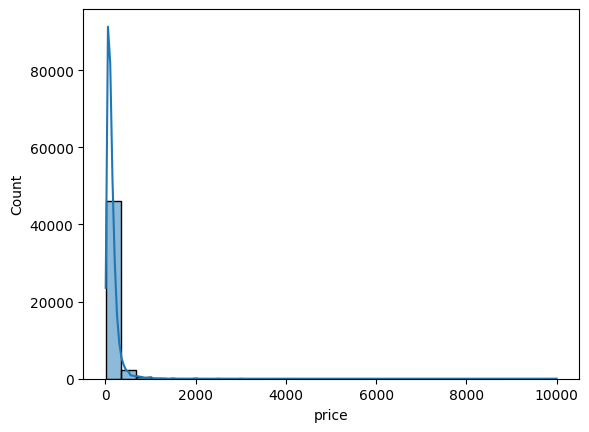

In [72]:
#Visualizando gráfico para entender os outliers
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(dados['price'], bins=30, kde=True)
plt.show()

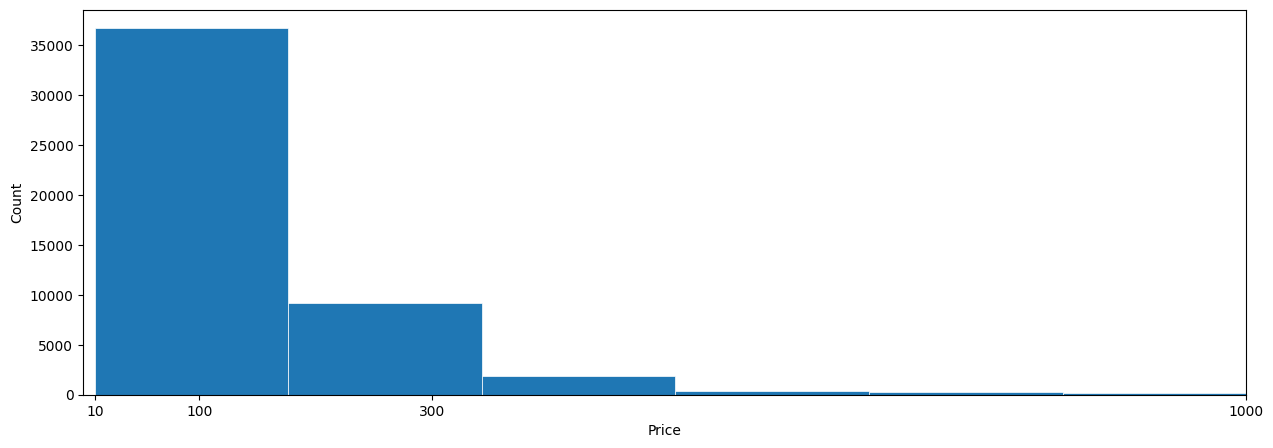

In [73]:
#Melhorando a visualização do gráfico para entender os outliers
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,5))
ax.hist(dados.price,bins=60, linewidth =0.5, edgecolor="white")
ax.set(xlim=(0, 1000),xticks=[10,100,300, 1000], xlabel= 'Price', ylabel= 'Count')
plt.show()

<Axes: >

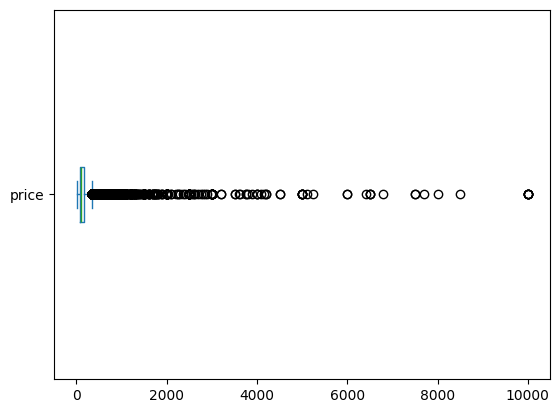

In [74]:
#Visualização dos outliers através de um boxplot
dados.price.plot.box(vert = False)

# Tratando os possíveis outliers estatísticos

In [75]:
#Quantidade de valores acima do limite superior calculado
outliers = dados.loc[dados.price > limite_superior]
#len(outliers_luxo)
outliers.head()

,bairro_group,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,nome_caracteres
60,Manhattan,40.74623,-73.99530,Entire home/apt,375,180,5,0.12,1,180,34.0
84,Brooklyn,40.69723,-73.99268,Entire home/apt,800,1,25,0.24,1,7,35.0
102,Manhattan,40.73096,-74.00319,Entire home/apt,500,4,46,0.55,2,243,49.0
113,Manhattan,40.72540,-73.98157,Entire home/apt,350,2,7,0.06,4,298,49.0
120,Brooklyn,40.66499,-73.97925,Entire home/apt,400,2,16,0.24,2,216,32.0


In [76]:
outliers.describe()

,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,nome_caracteres
count,2972.000000,2972.000000,2972.000000,2972.000000,2972.000000,2972.000000,2972.000000,2972.000000,2972.000000
mean,40.736065,-73.974366,658.775572,8.449865,12.949529,0.830871,14.936070,165.358345,39.406797
std,0.039500,0.034013,777.561289,28.739428,28.456551,1.310485,54.256958,140.791568,11.038185
min,40.530760,-74.202950,335.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,40.716015,-73.994580,380.000000,2.000000,0.000000,0.000000,1.000000,5.000000,33.000000
50%,40.738640,-73.980940,450.000000,3.000000,2.000000,0.190000,1.000000,161.000000,41.000000
75%,40.761070,-73.962185,650.000000,5.000000,11.000000,1.070000,2.000000,311.000000,48.000000
max,40.886710,-73.735290,10000.000000,1000.000000,447.000000,14.000000,327.000000,365.000000,174.000000


In [77]:
#Visualizando anúncios de maior valor
outliers.sort_values(by = 'price', ascending = False).head(10)

,bairro_group,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,nome_caracteres
17691,Brooklyn,40.73260,-73.95739,Entire home/apt,10000,5,5,0.16,1,0,47.0
29237,Manhattan,40.77213,-73.98665,Entire home/apt,10000,30,0,0.00,1,83,19.0
9150,Queens,40.76810,-73.91651,Private room,10000,100,2,0.04,1,0,35.0
40432,Manhattan,40.71980,-73.98566,Entire home/apt,9999,30,0,0.00,1,365,50.0
6529,Manhattan,40.79264,-73.93898,Entire home/apt,9999,5,1,0.02,1,0,18.0
12341,Manhattan,40.71355,-73.98507,Private room,9999,99,6,0.14,1,83,35.0
30267,Manhattan,40.72197,-74.00633,Entire home/apt,8500,30,2,0.18,1,251,49.0
4376,Brooklyn,40.69137,-73.96723,Entire home/apt,8000,1,1,0.03,11,365,13.0
29661,Manhattan,40.76824,-73.95989,Entire home/apt,7703,1,0,0.00,12,146,41.0
42522,Manhattan,40.71162,-74.01693,Entire home/apt,7500,1,0,0.00,1,364,35.0


- Vamos validar se o tamanho do anúncio, ou seja, sua quantidade de caracteres registrados na coluna 'nome_caracteres' tem relação com o preço. Inicialmente vamos calcular a média de caracteres dos anúncios outliers e comparar com a média dos anúncios com preços dentro dos limites padrão.

In [78]:
#Calculando a quantidade média de caracteres por anúncio de maior valor
outliers.nome_caracteres.mean()

np.float64(39.40679676985195)

In [79]:
dados.loc[dados.price <= limite_superior].nome_caracteres.mean()

np.float64(36.73683637472236)

É possivel verificar que o tamanho do nome do anúncio em si não impacta no valor diretamente. Mas podemos usar o heatmap para validar essa correlação de forma mais prática.

# Separando os outliers

Após uma primeira análise, é possível verificar que os outliers estatísticos, são referentes a anúncios de imóveis de luxo e representam cerca de 6% do dataset. Além disso, esses anúncios tem um número baixo de visualizações, o que denota pouca procura por este tipo de imóveis. Sendo assim, para evitar um ruído na análise, os dados serão tratados de maneira separada.

In [80]:
#Separando os dados dos anúncios de luxo
dados = dados.loc[dados.price <= limite_superior]

Verificando agora, valores muito abaixo da mediana.

In [81]:
#Verificando os valores abaixo da mediana para ver se são outliers
dados.loc[dados.price <= dados.price.median()].sort_values(by = 'price', ascending = True).head(10)

,bairro_group,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,nome_caracteres
31065,Manhattan,40.76844,-73.98333,Private room,10,1,2,0.13,1,0,47.0
34445,Bronx,40.83454,-73.92751,Private room,10,1,0,0.00,1,180,11.0
35600,Brooklyn,40.69508,-73.95164,Entire home/apt,10,3,5,0.51,1,0,44.0
22834,Queens,40.69085,-73.79916,Entire home/apt,10,1,43,1.68,1,252,23.0
21699,Manhattan,40.81302,-73.95349,Shared room,10,1,0,0.00,1,0,36.0
32809,Brooklyn,40.66242,-73.99464,Entire home/apt,10,1,14,1.06,1,4,50.0
23255,Manhattan,40.76844,-73.95341,Entire home/apt,10,3,10,0.39,1,0,38.0
22286,Manhattan,40.72237,-73.99817,Private room,10,5,2,0.07,1,0,7.0
47217,Brooklyn,40.69640,-73.91898,Private room,10,1,2,2.00,1,0,26.0
33504,Brooklyn,40.70959,-73.95693,Private room,10,1,0,0.00,1,83,16.0


In [82]:
len(dados.loc[(dados.price >= 10) & (dados.price < dados.price.median())].sort_values(by = 'price', ascending = True))

21876

- Validamos assim que esses valores muito abaixo da mediana, são imóveis que são alugados por cômodos separados. Por exemplo, apenas um quarto e não o imóvel inteiro.

# Pré Processamento dos Dados

In [83]:
#Fazendo uma nova visualização da descrição estatística dos dados
dados.describe()

,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,nome_caracteres
count,45922.00000,45922.000000,45922.000000,45922.00000,45922.000000,45922.000000,45922.000000,45922.000000,45922.000000
mean,40.72849,-73.950733,119.992008,6.93820,23.942990,1.107758,6.639715,109.373133,36.736836
std,0.05533,0.046471,68.127371,19.85802,45.315659,1.612669,31.008486,130.275350,10.455538
min,40.49979,-74.244420,10.000000,1.00000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,40.68924,-73.981928,65.000000,1.00000,1.000000,0.050000,1.000000,0.000000,30.000000
50%,40.72177,-73.954365,100.000000,2.00000,5.000000,0.380000,1.000000,39.000000,36.000000
75%,40.76339,-73.934313,159.000000,5.00000,24.000000,1.620000,2.000000,217.000000,46.000000
max,40.91306,-73.712990,334.000000,1250.00000,629.000000,58.500000,327.000000,365.000000,179.000000


In [84]:
#Verificando se existem dados duplicados
dados[dados.duplicated()]

,bairro_group,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,nome_caracteres


In [85]:
#Verificando valores nulos
dados[dados.price.isnull()]

,bairro_group,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,nome_caracteres


In [86]:
#Verificando valores abaixo ou igual a 0
dados.loc[dados.price <= 0]

,bairro_group,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,nome_caracteres


In [87]:
#Verificando as informações sobre do dataset após a separação
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45922 entries, 0 to 48893
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   bairro_group                   45922 non-null  object 
 1   latitude                       45922 non-null  float64
 2   longitude                      45922 non-null  float64
 3   room_type                      45922 non-null  object 
 4   price                          45922 non-null  int64  
 5   minimo_noites                  45922 non-null  int64  
 6   numero_de_reviews              45922 non-null  int64  
 7   reviews_por_mes                45922 non-null  float64
 8   calculado_host_listings_count  45922 non-null  int64  
 9   disponibilidade_365            45922 non-null  int64  
 10  nome_caracteres                45922 non-null  float64
dtypes: float64(4), int64(5), object(2)
memory usage: 4.2+ MB


# Análises iniciais do Negócio

* Vamos agora fazer algumas análises das variáveis categóricas, para que possamos entender o comportamento do negócio

### * Existe alguma relação entre as variáveis price e bairro_group?

<Axes: title={'center': 'price'}, xlabel='bairro_group'>

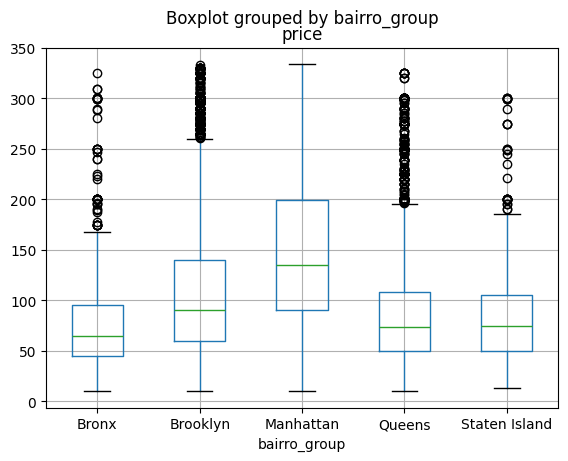

In [88]:
#Visualizando a comparação entre preço e grupos de bairros
dados.boxplot('price', 'bairro_group')

- Com base nesta visualização gráfica, é possível compreender que as variáveis 'bairro_group' e 'price' possuem relação entre si, pois verificamos que confome a localização do imóvel, é possivel verificar uma significativa variação de preços.

- Percebe-se que Manhattan possui a maior mediana (Preço médio mais alto), seguida por Brooklyn. Enquanto Bronx, Queens e Staten Island possuem uma mediana mais baixa, indicando preços predominantemente mais acessíveis.

- A partir deste insight, é possível pressupor que clientes que prefiram investir em imóveis mais acessíveis, devem procurar nos bairros Bronx, Queens ou Staten Island. Já aqueles que queiram, imóveis mais sofisticados com um aluguel mais alto, devem buscar investir em imóveis da região de Manhattan ou Brooklyn.

### * Existe relação entre a variável 'price'(preço) e 'room_type'(tipo de acomodação)?

<Axes: title={'center': 'price'}, xlabel='room_type'>

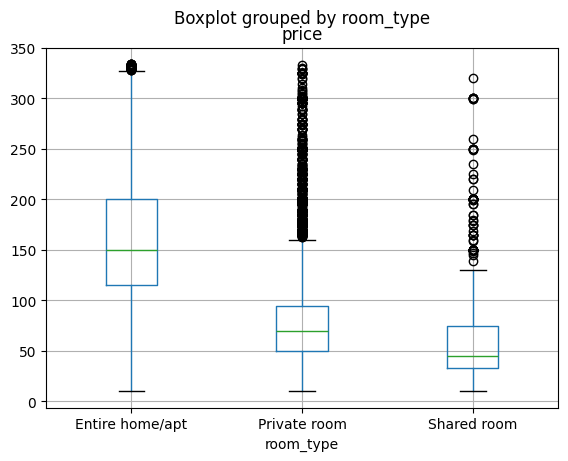

In [89]:
#Visualizando a comparação entre preço e tipo de acomodação
dados.boxplot('price', 'room_type')

array([[<Axes: title={'center': 'Entire home/apt'}>,
        <Axes: title={'center': 'Private room'}>],
       [<Axes: title={'center': 'Shared room'}>, <Axes: >]], dtype=object)

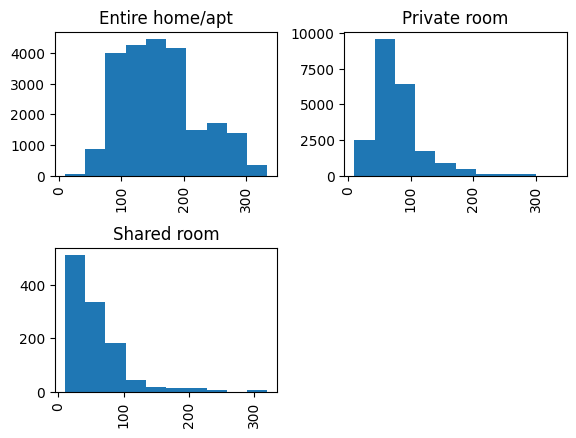

In [90]:
#Visualizando a comparação entre preço e grupos de bairros
dados.hist('price', 'room_type')

- Com base em nossa análise, é possível verificar uma relação importante entre preço e tipo de acomodação. Uma vez que podemos perceber que se o tipo de acomodação for o 'Entire home/apt' ou seja, o hóspede for alugar a casa inteira/apartamento, certamente o preço por noite será maior do que se ele for alugar apenas um quarto privado(Private room), que por sua vez é maior do que um quarto compartilhado(Shared room). Sendo assim, o tipo de acomodação irá impactar no preço do aluguel.

### Existe relação entre as variáveis bairro_group e numero_de_reviews?

<Axes: title={'center': 'numero_de_reviews'}, xlabel='bairro_group'>

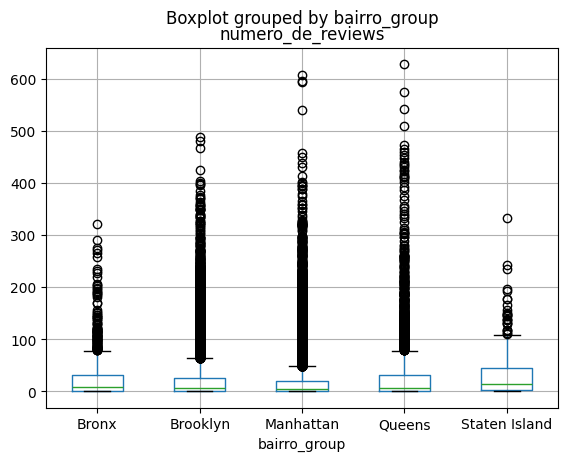

In [91]:
#Visualizando a comparação entre preço e tipo de acomodação
dados.boxplot('numero_de_reviews','bairro_group')

- Analisando graficamente, é possível verificar que as duas variáveis não possuem relação direta. Percebe-se que os valores de review são muito próximos, não expressando um impacto significativo para nossa análise.

In [92]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45922 entries, 0 to 48893
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   bairro_group                   45922 non-null  object 
 1   latitude                       45922 non-null  float64
 2   longitude                      45922 non-null  float64
 3   room_type                      45922 non-null  object 
 4   price                          45922 non-null  int64  
 5   minimo_noites                  45922 non-null  int64  
 6   numero_de_reviews              45922 non-null  int64  
 7   reviews_por_mes                45922 non-null  float64
 8   calculado_host_listings_count  45922 non-null  int64  
 9   disponibilidade_365            45922 non-null  int64  
 10  nome_caracteres                45922 non-null  float64
dtypes: float64(4), int64(5), object(2)
memory usage: 4.2+ MB


### Vamos avaliar a correlação entre as variáveis numéricas

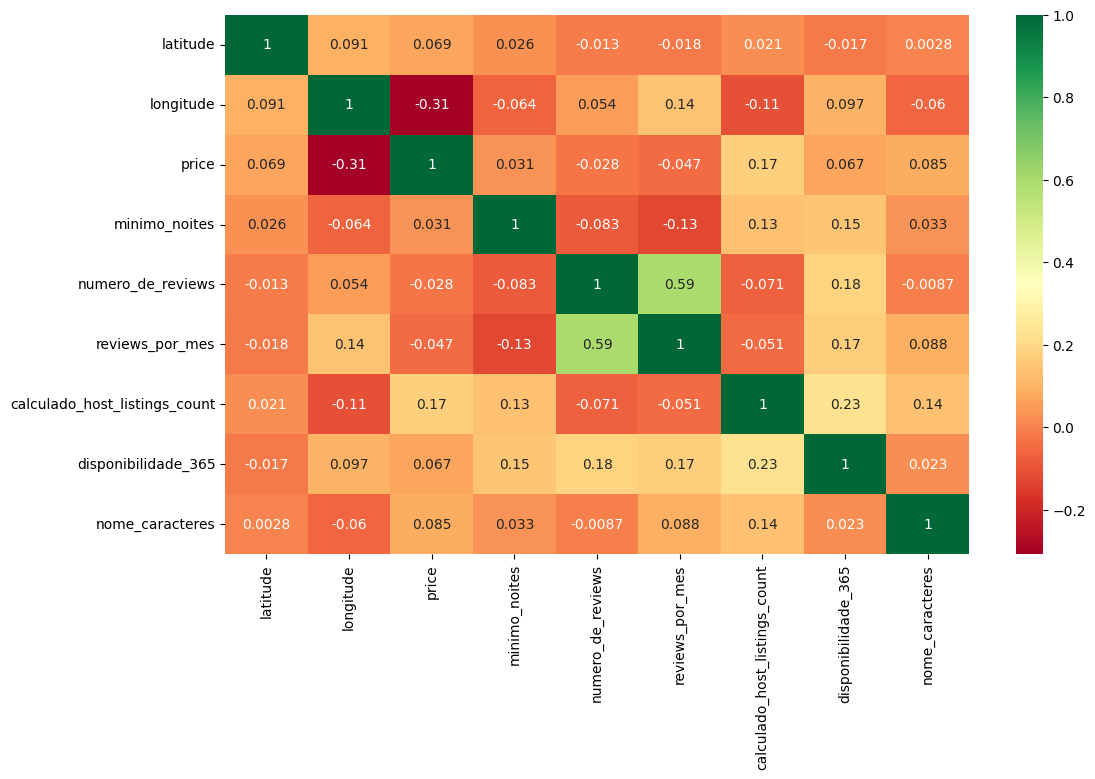

In [93]:
# Verificando a correlação das variáveis usando o seaborn
dados_v1 = dados.drop(['bairro_group','room_type'],axis= 1)
fig, ax = plt.subplots(figsize=(12,7))
sns.heatmap(dados_v1.corr(), annot=True, cmap='RdYlGn')
plt.show()

# Feature Engineering - Criando Novas variáveis

In [94]:
#Verificando novamente os dados estatísticos
dados.describe()

,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,nome_caracteres
count,45922.00000,45922.000000,45922.000000,45922.00000,45922.000000,45922.000000,45922.000000,45922.000000,45922.000000
mean,40.72849,-73.950733,119.992008,6.93820,23.942990,1.107758,6.639715,109.373133,36.736836
std,0.05533,0.046471,68.127371,19.85802,45.315659,1.612669,31.008486,130.275350,10.455538
min,40.49979,-74.244420,10.000000,1.00000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,40.68924,-73.981928,65.000000,1.00000,1.000000,0.050000,1.000000,0.000000,30.000000
50%,40.72177,-73.954365,100.000000,2.00000,5.000000,0.380000,1.000000,39.000000,36.000000
75%,40.76339,-73.934313,159.000000,5.00000,24.000000,1.620000,2.000000,217.000000,46.000000
max,40.91306,-73.712990,334.000000,1250.00000,629.000000,58.500000,327.000000,365.000000,179.000000


In [95]:
#Vamos criar a variável preço por noite que será a divisão do preço pelo minimo de noites exigidas pelo anunciante
dados['preco_por_noite'] = dados.price/dados.minimo_noites
dados.head(10)

,bairro_group,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,nome_caracteres,preco_por_noite
0,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,21.0,225.000000
1,Manhattan,40.80902,-73.94190,Private room,150,3,0,0.00,1,365,35.0,50.000000
2,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,31.0,89.000000
3,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,48.0,8.000000
4,Manhattan,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129,41.0,66.666667
5,Brooklyn,40.68688,-73.95596,Private room,60,45,49,0.40,1,0,15.0,1.333333
6,Manhattan,40.76489,-73.98493,Private room,79,2,430,3.47,1,220,32.0,39.500000
7,Manhattan,40.80178,-73.96723,Private room,79,2,118,0.99,1,0,34.0,39.500000
8,Manhattan,40.71344,-73.99037,Entire home/apt,150,1,160,1.33,4,188,34.0,150.000000
9,Manhattan,40.80316,-73.96545,Entire home/apt,135,5,53,0.43,1,6,32.0,27.000000


In [96]:
#Verificando a variabilidade da variável tipo de acomodação
dados.room_type.value_counts()

room_type
Entire home/apt    22789
Private room       21995
Shared room         1138
Name: count, dtype: int64

In [97]:
#Verificando a variabilidade da variável tipo de grupo de bairros
dados.bairro_group.value_counts()

bairro_group
Manhattan        19506
Brooklyn         19414
Queens            5567
Bronx             1070
Staten Island      365
Name: count, dtype: int64

### Realizando o One-Hot Encoding das variáveis categóricas

In [98]:
#Transformando as variáveis categóricas em numéricas
dados_encoded = pd.get_dummies(dados, columns= ['bairro_group','room_type'],dtype= int)
dados_encoded.head()

,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,nome_caracteres,preco_por_noite,bairro_group_Bronx,bairro_group_Brooklyn,bairro_group_Manhattan,bairro_group_Queens,bairro_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,40.75362,-73.98377,225,1,45,0.38,2,355,21.0,225.000000,0,0,1,0,0,1,0,0
1,40.80902,-73.94190,150,3,0,0.00,1,365,35.0,50.000000,0,0,1,0,0,0,1,0
2,40.68514,-73.95976,89,1,270,4.64,1,194,31.0,89.000000,0,1,0,0,0,1,0,0
3,40.79851,-73.94399,80,10,9,0.10,1,0,48.0,8.000000,0,0,1,0,0,1,0,0
4,40.74767,-73.97500,200,3,74,0.59,1,129,41.0,66.666667,0,0,1,0,0,1,0,0


In [99]:
#Validação do dataset
dados_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45922 entries, 0 to 48893
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   latitude                       45922 non-null  float64
 1   longitude                      45922 non-null  float64
 2   price                          45922 non-null  int64  
 3   minimo_noites                  45922 non-null  int64  
 4   numero_de_reviews              45922 non-null  int64  
 5   reviews_por_mes                45922 non-null  float64
 6   calculado_host_listings_count  45922 non-null  int64  
 7   disponibilidade_365            45922 non-null  int64  
 8   nome_caracteres                45922 non-null  float64
 9   preco_por_noite                45922 non-null  float64
 10  bairro_group_Bronx             45922 non-null  int64  
 11  bairro_group_Brooklyn          45922 non-null  int64  
 12  bairro_group_Manhattan         45922 non-null  int6

In [100]:
dados_encoded.describe()

,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,nome_caracteres,preco_por_noite,bairro_group_Bronx,bairro_group_Brooklyn,bairro_group_Manhattan,bairro_group_Queens,bairro_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
count,45922.00000,45922.000000,45922.000000,45922.00000,45922.000000,45922.000000,45922.000000,45922.000000,45922.000000,45922.000000,45922.000000,45922.000000,45922.000000,45922.000000,45922.000000,45922.000000,45922.000000,45922.000000
mean,40.72849,-73.950733,119.992008,6.93820,23.942990,1.107758,6.639715,109.373133,36.736836,54.962124,0.023300,0.422760,0.424764,0.121227,0.007948,0.496255,0.478964,0.024781
std,0.05533,0.046471,68.127371,19.85802,45.315659,1.612669,31.008486,130.275350,10.455538,51.452114,0.150857,0.494003,0.494312,0.326395,0.088799,0.499991,0.499563,0.155459
min,40.49979,-74.244420,10.000000,1.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.68924,-73.981928,65.000000,1.00000,1.000000,0.050000,1.000000,0.000000,30.000000,18.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,40.72177,-73.954365,100.000000,2.00000,5.000000,0.380000,1.000000,39.000000,36.000000,41.291667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,40.76339,-73.934313,159.000000,5.00000,24.000000,1.620000,2.000000,217.000000,46.000000,75.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,40.91306,-73.712990,334.000000,1250.00000,629.000000,58.500000,327.000000,365.000000,179.000000,333.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Definição de um Modelo de Previsão

- Devemos utilizar um modelo de Regressão para este projeto em específico, pois queremos realizar a previsão de dados numéricos, neste caso o preço dos imóveis.

**Antes de definir o modelo, o primeiro passo é separar os nossos dados em treino e teste**

Esta etapa é extremamente importante  pois vamos precisar **avaliar a qualidade do nosso modelo**

**Vamos utilizar o train_test_split do próprio Scikit_Learn**

In [101]:
#Realizando a separação dos dados
dados_model = dados_encoded
x = dados_model.drop('price',axis=1)
y = dados_model.price

In [102]:
x.head()

,latitude,longitude,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,nome_caracteres,preco_por_noite,bairro_group_Bronx,bairro_group_Brooklyn,bairro_group_Manhattan,bairro_group_Queens,bairro_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,40.75362,-73.98377,1,45,0.38,2,355,21.0,225.000000,0,0,1,0,0,1,0,0
1,40.80902,-73.94190,3,0,0.00,1,365,35.0,50.000000,0,0,1,0,0,0,1,0
2,40.68514,-73.95976,1,270,4.64,1,194,31.0,89.000000,0,1,0,0,0,1,0,0
3,40.79851,-73.94399,10,9,0.10,1,0,48.0,8.000000,0,0,1,0,0,1,0,0
4,40.74767,-73.97500,3,74,0.59,1,129,41.0,66.666667,0,0,1,0,0,1,0,0


In [103]:
y.head()

0    225
1    150
2     89
3     80
4    200
Name: price, dtype: int64

In [104]:
#Verificando o desbalanceamento da variável target  Y
from scipy.stats import skew, kurtosis

print(f"Skewness: {skew(y):.2f}")
print(f"Kurtosis: {kurtosis(y):.2f}")

Skewness: 0.93
Kurtosis: 0.17


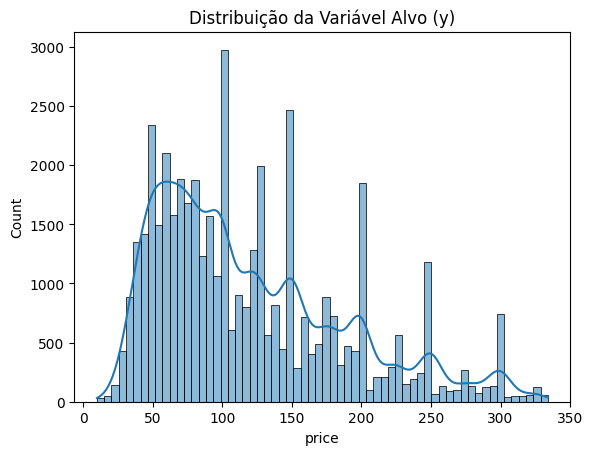

In [105]:
#Visualizando graficamente
sns.histplot(y, kde=True)
plt.title("Distribuição da Variável Alvo (y)")
plt.show()

Existe um desbalanceamento moderado para a direita, o que dependendo do modelo utilizado, pode afetar os resultados. Portanto no caso de modelos de Árvores de decisão e Random Forest, este formato não interfere significativamente no desempenho. Entretanto, no caso de Regressão linear, é necessário a transformação da variável target.

In [106]:
#Transformando a variável target para uma base logarítmica
import numpy as np
y_transformed = np.log(y)

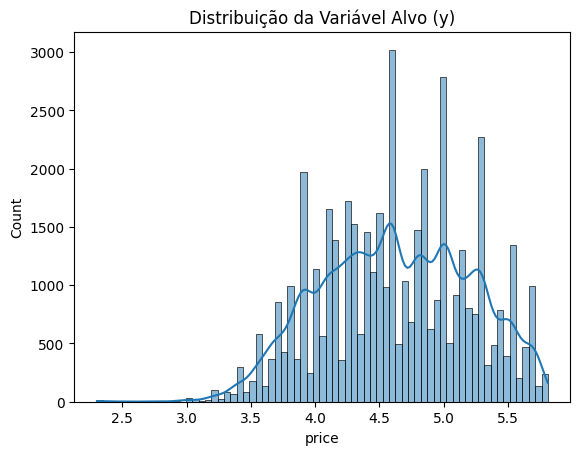

In [107]:
sns.histplot(y_transformed, kde=True)
plt.title("Distribuição da Variável Alvo (y)")
plt.show()

In [108]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y_transformed, test_size=0.2, random_state=42)

### Uma vez separado, a base de treino e teste, podemos usar a base de treino para criar nosso modelo usando diferentes algoritmos

# Modelo de Regressão Linear

In [109]:
# Importando a regressão linear
from sklearn.linear_model import LinearRegression

In [110]:
# Treinando o nosso modelo
reg = LinearRegression().fit(x_train, y_train)

In [111]:
# Avaliando o ajuste do modelo aos dados de Treino
reg.score(x_train, y_train)

0.6653273195744116

In [112]:
# Avaliando o ajuste do modelo aos dados de Teste
reg.score(x_test, y_test)

0.6607714483106264

In [113]:
# Importando o erro médio absoluto
from sklearn.metrics import mean_absolute_error

In [114]:
# Fazendo a previsão com o modelo anterior
y_pred = reg.predict(x_test)

# Transformando de volta a variável y
y_pred = np.exp(y_pred)

In [115]:
#Agora, avaliamos o erro para o modelo de regressão linear
mean_absolute_error(y_test, y_pred)

110.30146341209952

In [116]:
#Avaliando o RMSE(Erro Quadrático) para o modelo
from sklearn.metrics import root_mean_squared_error
root_mean_squared_error(y_test, y_pred)

125.70968014465524

In [117]:
#Avaliando o MAPE para o modelo
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred)

23.020188428393794

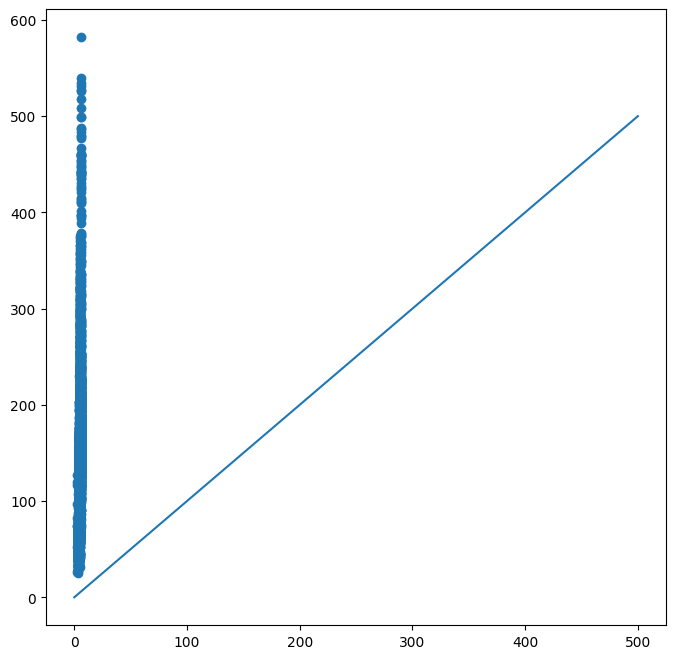

In [118]:
#Visualizando o target de teste como o valor previsto pelo modelo
fig, ax = plt.subplots(figsize= (8,8))
ax.scatter(y_test, y_pred)
ax.plot([0,500],[0,500])

plt.show()

# Modelo Árvore de Decisão

In [119]:
#Definindo os dados de teste e treino
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [120]:
#Importanto o modelo de árvore de decisão
from sklearn import tree

In [121]:
#Criando o regressor e treinando o modelo
regTree = tree.DecisionTreeRegressor(random_state=10, max_depth=10)
regTree = regTree.fit(x_train, y_train)

In [122]:
#Avaliando o modelo em relação aos dados de treino
regTree.score(x_train, y_train)

0.9505118091516656

In [123]:
#Avaliando o modelo em relação aos dados de teste
regTree.score(x_test, y_test)

0.9450084084376803

In [124]:
# Fazendo a previsão
y_predTree = regTree.predict(x_test)

In [125]:
# Avaliando o erro médio do modelo de Árvore de decisão
mean_absolute_error(y_test, y_predTree)

7.140655728417751

In [126]:
# Avaliando o erro quadrático do modelo de Árvore de decisão
root_mean_squared_error(y_test, y_predTree)

15.962023925873348

In [127]:
#Avaliando o MAPE para o modelo
mean_absolute_percentage_error(y_test, y_predTree)

0.0756276964260262

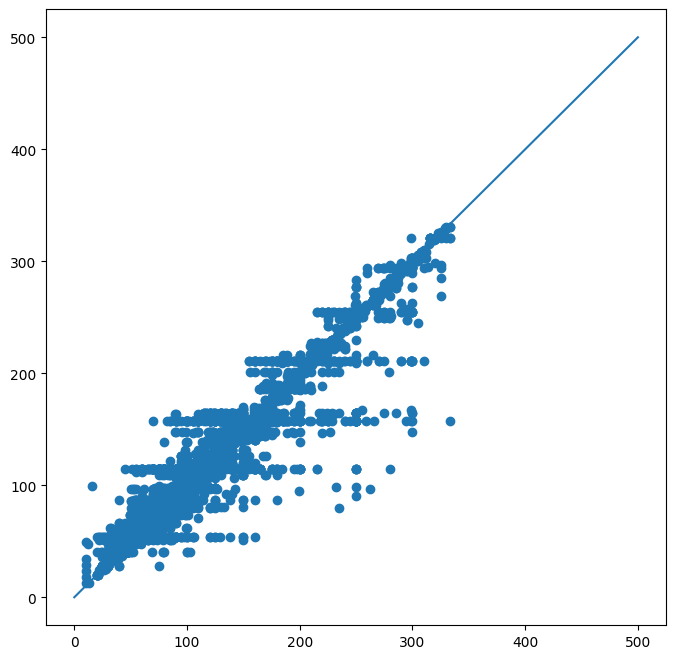

In [128]:
#Visualizando a comparação entre o valor real e o previsto pelo modelo
fig, ax = plt.subplots(figsize= (8,8))
ax.scatter(y_test, y_predTree)
ax.plot([0,500],[0,500])

plt.show()

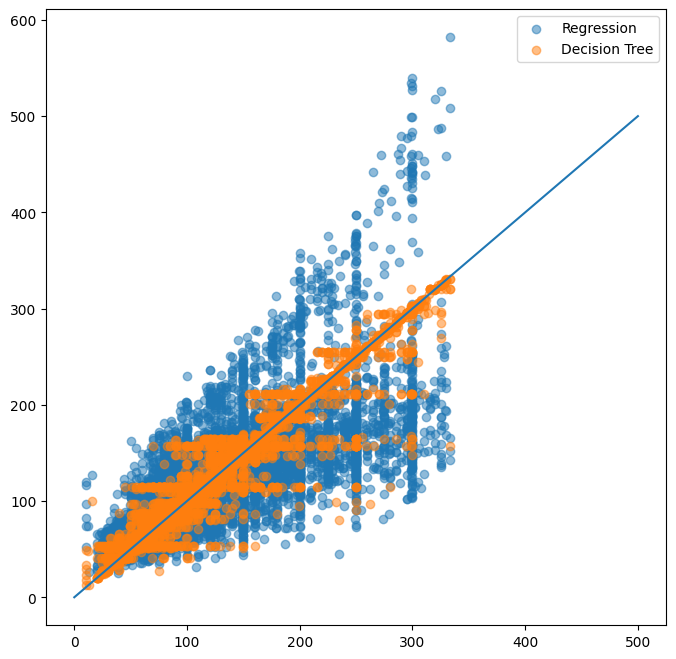

In [129]:
#Comparando os modelos já treinados

fig, ax = plt.subplots(figsize= (8,8))
ax.scatter(y_test, y_pred, alpha=0.5, label= 'Regression')
ax.scatter(y_test, y_predTree, alpha=0.5, label= 'Decision Tree')

ax.plot([0,500],[0,500])
ax.legend()

plt.show()

# Modelo Random Forest

In [130]:
#Dividindo os dados de treino e teste, usando a variável target original sem transformação
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [131]:
#Importantdo o Random Forest
from sklearn.ensemble import RandomForestRegressor

In [132]:
#Treinando o modelo
regr = RandomForestRegressor(max_depth= 50, random_state= 0)
regr = regr.fit(x_train,y_train)


In [133]:
#Verificar as variáveis mais importantes do modelo
feature_importance_ = regr.feature_importances_
display(feature_importance_)

array([1.28852765e-02, 2.24064971e-02, 1.88313887e-01, 3.26080611e-04,
       3.86076243e-04, 4.85219130e-03, 1.12971486e-03, 3.80488014e-03,
       3.65829020e-01, 6.66335534e-07, 1.47421024e-05, 1.18872233e-02,
       8.21040729e-06, 3.13901404e-06, 3.88006482e-01, 7.03159583e-05,
       7.55966849e-05])

In [134]:
regr.score(x_train, y_train)

0.9994418121258796

In [135]:
regr.score(x_test, y_test)

0.9963978634427767

In [136]:
#Realizando a predição
y_predRF = regr.predict(x_test)

In [137]:
#Avaliando o erro médio para o modelo de Random Forest
mean_absolute_error(y_test, y_predRF)

0.7508013064779532

In [138]:
#Avaliando o erro quadrático para o modelo Random Forest
root_mean_squared_error(y_test, y_predRF)

4.085261858548648

In [139]:
#Avaliando o erro percentual do Random Forest
mean_absolute_percentage_error(y_test, y_predRF)

0.008648257958515804

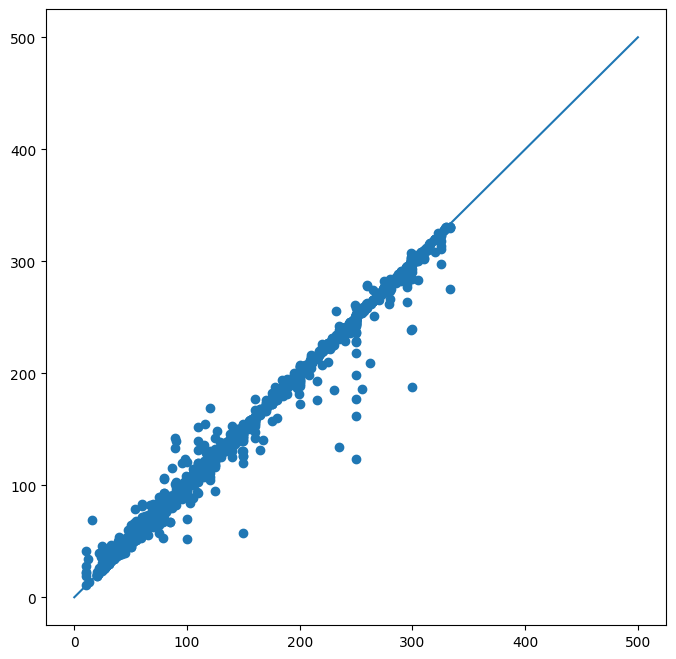

In [140]:
#Visualizando a comparação entre o valor real e o previsto pelo modelo
fig, ax = plt.subplots(figsize= (8,8))
ax.scatter(y_test, y_predRF)
ax.plot([0,500],[0,500])

plt.show()

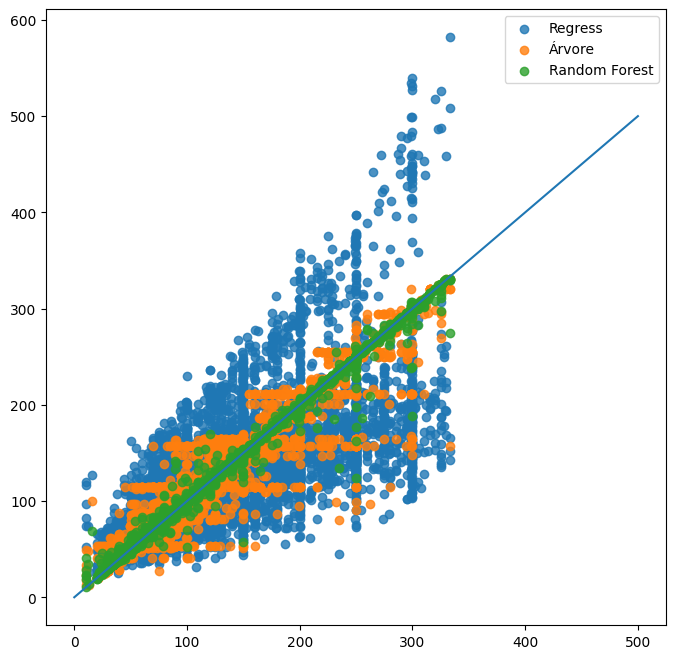

In [141]:
#Comparando os modelos já treinados

fig, ax = plt.subplots(figsize= (8,8))
ax.scatter(y_test, y_pred, alpha=0.8, label= 'Regress')
ax.scatter(y_test, y_predTree, alpha=0.8, label= 'Árvore')
ax.scatter(y_test, y_predRF, alpha=0.8, label= 'Random Forest')
ax.plot([0,500],[0,500])
ax.legend()

plt.show()

# Fazendo o tuning do modelo Random Forest

In [142]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2']
# }

# regr = RandomForestRegressor(random_state=0)
# grid_search = GridSearchCV(regr, param_grid, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)
# grid_search.fit(x_train, y_train)

# print("Melhores Hiperparâmetros:", grid_search.best_params_)


In [143]:
#Dividindo os dados de treino e teste, usando a variável target original sem transformação
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
#Importantdo o Random Forest
from sklearn.ensemble import RandomForestRegressor
#Treinando o modelo
regr_tunning = RandomForestRegressor(max_depth= 30, max_features= 'sqrt', min_samples_leaf= 1,
                                     min_samples_split= 2, n_estimators= 300, random_state= 0)
regr_tunning = regr_tunning.fit(x_train,y_train)

In [144]:
#Verificar as variáveis mais importantes do modelo
regr_tunning.feature_importances_


array([0.05448871, 0.07782756, 0.11606689, 0.01680203, 0.02049684,
       0.01806278, 0.02652312, 0.02317848, 0.27300767, 0.00072463,
       0.00514161, 0.0323888 , 0.00388506, 0.00044192, 0.19490617,
       0.12555639, 0.01050134])

In [145]:
# Avaliando o modelo em relação aos dados de treino. R² SCORE
regr_tunning.score(x_train, y_train)

0.9907420566229662

In [146]:
# Avaliando o modelo em relação aos dados de teste. R² SCORE
regr_tunning.score(x_test, y_test)

0.9319296307551482

In [147]:
# Fazendo a predição do modelo otimizado por cross-validation
y_predRF_cv = regr_tunning.predict(x_test)

In [148]:
# Avaliando o erro médio do modelo otimizado
mean_absolute_error(y_test, y_predRF_cv)

10.73432212440429

In [149]:
# Avaliando o erro quadrático do modelo otimizado
root_mean_squared_error(y_test, y_predRF_cv)

17.759014673265067

In [150]:
#Avaliando o erro percentual do Random Forest
mean_absolute_percentage_error(y_test, y_predRF_cv)

0.10779898053328368

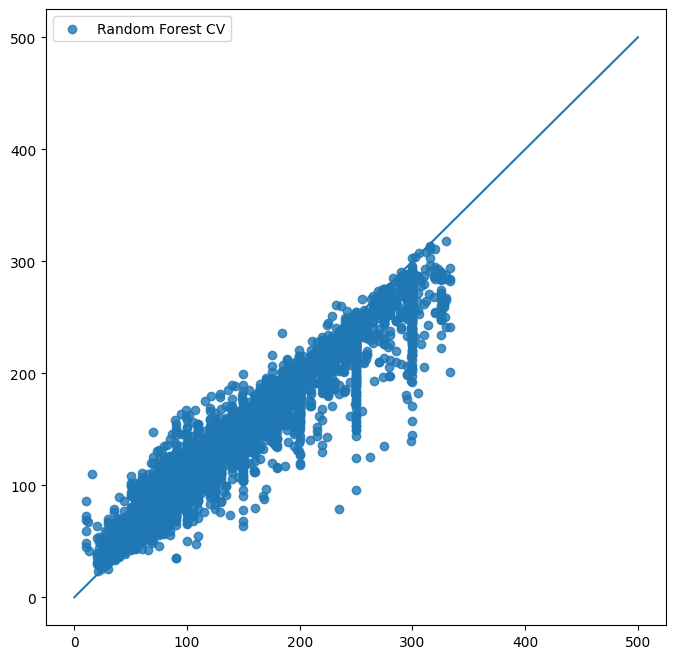

In [151]:
# Visualizando o gráfico
fig, ax = plt.subplots(figsize= (8,8))
ax.scatter(y_test, y_predRF_cv, alpha=0.8, label= 'Random Forest CV')
ax.plot([0,500],[0,500])
ax.legend()

plt.show()

# Avaliação dos Modelos

In [152]:
#Vamos avaliar os modelos de forma comparativa
#Dividindo os dados de treino e teste, usando a variável target original sem transformação
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

modelos = {
    'Regressão Linear': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Árvore de Decisão': tree.DecisionTreeRegressor(),
    'Random Forest Tunned': RandomForestRegressor()   
}

In [153]:
resultados = []

#Realizar o treinamento dos modelos e calcular as métricas, salvando na lista de resiu
for name, modelo in modelos.items():
    modelo = modelo.fit(x_train, y_train)
    y_pred = modelo.predict(x_test)

    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    r2 = modelo.score(x_test, y_test)

    resultados.append([name, mae, mape, rmse, r2])

#Cria uma tabela para armazenar as métricas dos modelos
df_resultados = pd.DataFrame(resultados, columns=['Modelo', 'MAE', 'MAPE','RMSE', 'R²'])
df_resultados.sort_values(by="RMSE", ascending=True, inplace=True)  # Ordenar pelo melhor RMSE

print(df_resultados)

                 Modelo        MAE      MAPE       RMSE        R²
3  Random Forest Tunned   0.761683  0.008853   4.147637  0.996287
1         Random Forest   0.772605  0.008837   4.265349  0.996073
2     Árvore de Decisão   1.120523  0.011729   6.563222  0.990703
0      Regressão Linear  30.643937  0.294602  41.661007  0.625390


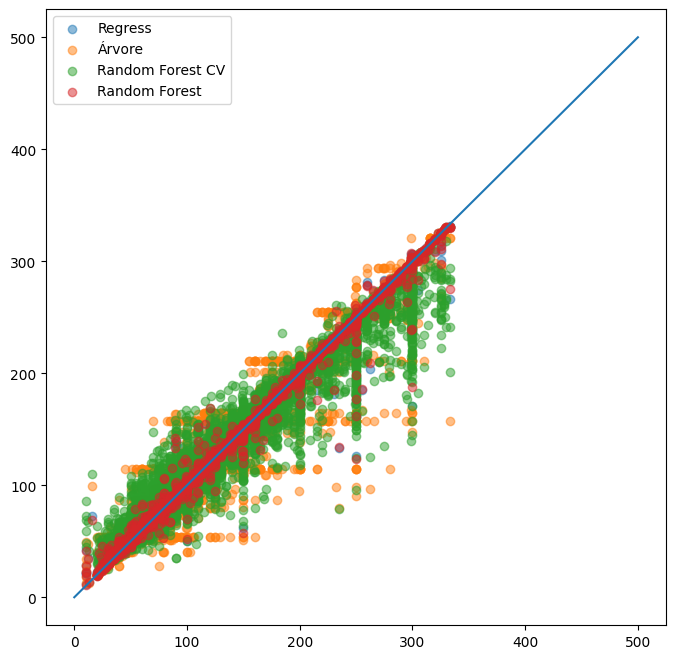

In [154]:
#Comparando os modelos já treinados

fig, ax = plt.subplots(figsize= (8,8))
ax.scatter(y_test, y_pred, alpha=0.5, label= 'Regress')
ax.scatter(y_test, y_predTree, alpha=0.5, label= 'Árvore')
ax.scatter(y_test, y_predRF_cv, alpha=0.5, label= 'Random Forest CV')
ax.scatter(y_test, y_predRF, alpha=0.5, label= 'Random Forest')

ax.plot([0,500],[0,500])
ax.legend()

plt.show()

# Realizando a previsão de novos dados

- Preparar os dados para inserir no modelo

In [155]:
#Visualizando o formato dos dados de entrada para o modelo
x_test.head(5)

,latitude,longitude,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,nome_caracteres,preco_por_noite,bairro_group_Bronx,bairro_group_Brooklyn,bairro_group_Manhattan,bairro_group_Queens,bairro_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
40960,40.68793,-73.84975,1,16,3.36,3,121,50.0,42.000000,0,0,0,1,0,0,1,0
530,40.74033,-74.00024,6,23,0.27,2,0,28.0,24.833333,0,0,1,0,0,1,0,0
22963,40.76446,-73.99343,30,4,0.17,31,344,40.0,4.166667,0,0,1,0,0,1,0,0
48420,40.58954,-73.81361,1,0,0.00,1,67,42.0,125.000000,0,0,0,1,0,1,0,0
11792,40.76236,-73.99261,1,6,0.14,1,0,30.0,95.000000,0,0,1,0,0,1,0,0


In [156]:
novo_dado = {
    'id': 2595,
    'nome': 'Skylit Midtown Castle',
    'host_id': 2845,
    'host_name': 'Jennifer',
    'bairro_group': 'Manhattan',
    'bairro': 'Midtown',
    'latitude': 40.75362,
    'longitude': -73.98377,
    'room_type': 'Entire home/apt',
    'minimo_noites': 1,
    'numero_de_reviews': 45,
    'ultima_review': '2019-05-21',
    'reviews_por_mes': 0.38,
    'calculado_host_listings_count': 2,
    'disponibilidade_365': 355
}

# Criar DataFrame
df_novo = pd.DataFrame([novo_dado])
df_novo.head()



,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,1,45,2019-05-21,0.38,2,355


In [157]:
#Criar coluna nome_caracteres
df_novo['nome_caracteres'] = df_novo.nome.str.len()

# Remover colunas irrelevantes (ajuste conforme necessário)
df_novo = df_novo.drop(['id', 'host_id', 'host_name', 'nome', 'bairro', 'ultima_review'], axis= 1)

# Criar nova feature: preco_por_noite (se aplicável)
df_novo['preco_por_noite'] = df_novo.minimo_noites

# One-hot encoding para variáveis categóricas
df_novo = pd.get_dummies(df_novo, columns=['bairro_group', 'room_type'],dtype= int)

df_novo.head()

,latitude,longitude,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,nome_caracteres,preco_por_noite,bairro_group_Manhattan,room_type_Entire home/apt
0,40.75362,-73.98377,1,45,0.38,2,355,21,1,1,1


In [158]:
x_test.columns

Index(['latitude', 'longitude', 'minimo_noites', 'numero_de_reviews',
       'reviews_por_mes', 'calculado_host_listings_count',
       'disponibilidade_365', 'nome_caracteres', 'preco_por_noite',
       'bairro_group_Bronx', 'bairro_group_Brooklyn', 'bairro_group_Manhattan',
       'bairro_group_Queens', 'bairro_group_Staten Island',
       'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room'],
      dtype='object')

In [159]:
# Ajustar colunas para que tenham a mesma estrutura do conjunto de treinamento
colunas_modelo = ['latitude', 'longitude', 'minimo_noites', 'numero_de_reviews',
       'reviews_por_mes', 'calculado_host_listings_count',
       'disponibilidade_365', 'nome_caracteres', 'preco_por_noite',
       'bairro_group_Bronx', 'bairro_group_Brooklyn', 'bairro_group_Manhattan',
       'bairro_group_Queens', 'bairro_group_Staten Island',
       'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room'] 
for col in colunas_modelo:
    if col not in df_novo.columns:
        df_novo[col] = 0  # Adiciona colunas ausentes com valor 0

# Reordenar colunas na mesma ordem do treinamento
df_novo = df_novo[colunas_modelo]

# Exibir DataFrame transformado
df_novo.head()

,latitude,longitude,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,nome_caracteres,preco_por_noite,bairro_group_Bronx,bairro_group_Brooklyn,bairro_group_Manhattan,bairro_group_Queens,bairro_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,40.75362,-73.98377,1,45,0.38,2,355,21,1,0,0,1,0,0,1,0,0


# Realizando a previsão

In [160]:
# Aplicando os novos dados para o modelo
nova_pred = regr.predict(df_novo)
print('A sugestão de preço em dolars para este imóvel é: U$', nova_pred[0])

A sugestão de preço em dolars para este imóvel é: U$ 27.12


# Salvando modelo
 - Persistindo o Modelo Random Forest

In [161]:
import pickle

with open('LH_CD_MATHEUS-BORGES.pkl', 'wb') as arquivo:
    pickle.dump(regr, arquivo)